In [331]:
import math
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [332]:
L_ls = 0.433/(2 * math.pi * 400)
L_lr = 0.623/(2 * math.pi * 400)
L_m = 8.71/(2 * math.pi * 400)
R_s = 0.047
R_r=.05
R_c = 10
J = 0.000675
T_L = 1
P = 4

In [333]:
def dxdt(t, x, v, omega_s):
    i_s ,i_r, i_m ,omega_r = x[0], x[1], x[2], x[3]
   
    V=v* math.sin (omega_s * t)
    s = (omega_s - omega_r) / omega_s

    E_1 = R_c * (i_s - i_m - i_r)

    dis_dt = (1 / L_ls ) * (V - R_s * i_s - E_1)
    dir_dt = (1 / L_lr ) * (E_1 - (R_r / s) * i_r)
    dim_dt = (1 / L_m ) * E_1
    
    dwr_dt = ((P / 2) / J) * (3 * (P / 2)  * ((i_r * i_r * R_r) / (s * omega_s)) - T_L)
  
    return [dis_dt, dir_dt, dim_dt, dwr_dt]

In [334]:
s0 = [0.0, 0.0, 0.0, 0.0]
t0 = 0

solver = integrate.ode(dxdt)
solver.set_integrator('dopri5')
solver.set_initial_value(s0, t0)
solver.set_f_params(105*1.414 , 2 * math.pi * 400)

t_end = 2.5
dt = 0.00001

omega = []
power = []
t = []

while solver.successful() and solver.t < t_end:
    i_s, i_r, i_m, w_r = solver.integrate(solver.t+dt)
    w_s = 2 * math.pi * 400 
    s = (w_s - w_r) / w_s
    powe = (3 * i_r * i_r * R_r * (1 - s)) / s
    t.append(solver.t)
    power.append(powe)
    omega.append(w_r)


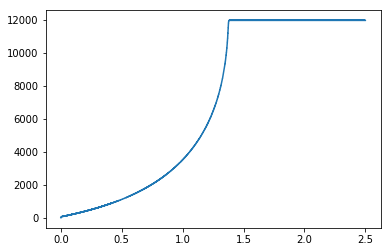

In [335]:
omega=np.dot(60/(4*math.pi) ,omega)
plt.plot(t, omega)

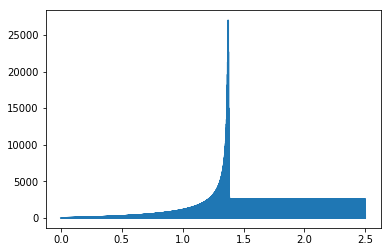

In [330]:
plt.plot(t, power)


In [6]:
A = np.asarray([[1, 0, 0], [0, 1, 0], [0, 0.5, 1]])

In [7]:
np.linalg.inv(A)

array([[ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. , -0.5,  1. ]])

In [227]:
print(i_s)

2.01917789536
